In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

In [24]:
df = pd.read_csv("Dataset3/dataset3.csv")

In [25]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [26]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [27]:
X = df[['ratio_to_median_purchase_price', 'online_order']]
y = df['fraud']
X = np.array(X)
y = np.array(y).astype(int)
target_names = ['not fraud', 'fraud']
target_names = np.reshape(target_names, (1,-1))[0]
target_names
print(X)
print(y)

[[1.94593998 0.        ]
 [1.29421881 0.        ]
 [0.42771456 1.        ]
 ...
 [0.21807549 1.        ]
 [0.47582206 1.        ]
 [0.38691985 1.        ]]
[0 0 0 ... 0 0 0]


In [28]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 70)
#train decision tree

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X,y)
print(X_train.shape)

(700000, 2)


In [29]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[638585      2]
 [   997  60416]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    638587
           1       1.00      0.98      0.99     61413

    accuracy                           1.00    700000
   macro avg       1.00      0.99      1.00    700000
weighted avg       1.00      1.00      1.00    700000



In [30]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[274006      4]
 [   432  25558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    274010
           1       1.00      0.98      0.99     25990

    accuracy                           1.00    300000
   macro avg       1.00      0.99      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Text(0.5, 1.0, '2-Class classification with Decision Tree- Training Data')

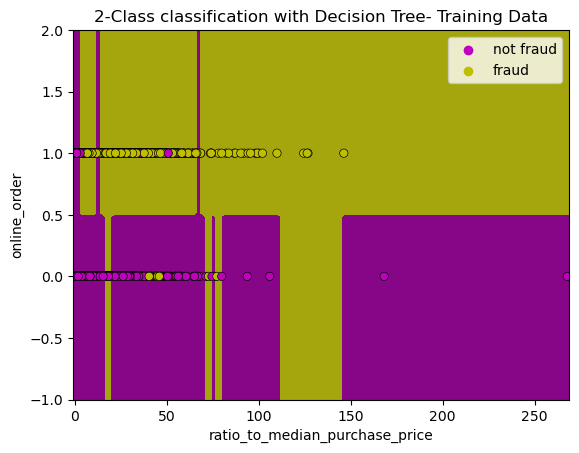

In [31]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='ratio_to_median_purchase_price',
    ylabel='online_order',
)

# Plot training data

sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=target_names[y_train],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with Decision Tree- Training Data")

Text(0.5, 1.0, '2-Class classification with Decision Tree- Training Data')

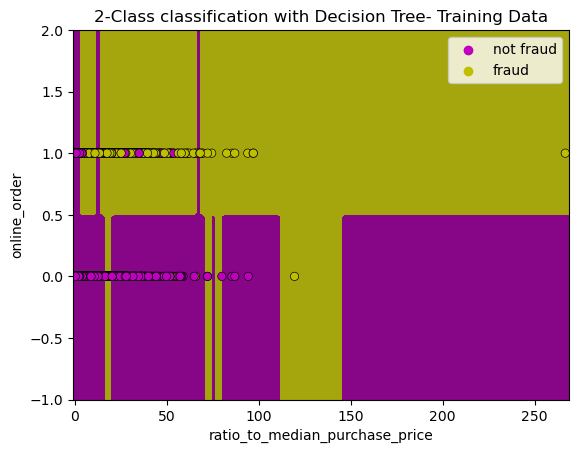

In [32]:
# Plot the decision boundary

# Create color maps
cmap_boundary = ListedColormap(["#870587","#a5a50d"])
cmap_scatter = ["m","y"] 

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_boundary, #add colortheme
    response_method="predict",
    xlabel='ratio_to_median_purchase_price',
    ylabel='online_order',
)

# Plot testing data

sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=target_names[y_test],
        palette=cmap_scatter,
        alpha=1.0,
        edgecolor="black",
    )

plt.title("2-Class classification with Decision Tree- Training Data")